<a href="https://colab.research.google.com/github/jiho050718/datajo/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터조 발표 자료

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## 데이터 불러오기

!git clone https://github.com/jiho050718/datajo

"분석할 데이터는 GitHub에 있습니다. 이 코드는 그 데이터를 우리 컴퓨터로 다운로드하는 명령어입니다."

In [3]:
!git clone https://github.com/jiho050718/datajo

Cloning into 'datajo'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 158 (delta 53), reused 17 (delta 17), pack-reused 72 (from 1)
Receiving objects: 100% (158/158), 7.82 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (66/66), done.


## CSV 불러와서 일부 출력

"데이터를 다운로드했으니 이제 실제로 읽어와서 df라는 이름으로 저장합니다. 제대로 가져왔는지 확인하기 위해 데이터 중에서 아무거나 3개만 뽑아서 한번 살펴볼게요."


In [87]:
# CSV 파일 불러오기
df = pd.read_csv("datajo/titanic1309.csv")
df.sample(3)

PassengerId  Survived  Pclass                               Name  \
536           537         0       1  Butt, Major. Archibald Willingham   
403           404         0       3     Hakkarainen, Mr. Pekka Pietari   
1113         1114         1       2         Cook, Mrs. (Selena Rogers)   

         Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked  
536     male  45.0      0      0            113050  26.55   B38        S  
403     male  28.0      1      0  STON/O2. 3101279  15.85   NaN        S  
1113  female  22.0      0      0       W./C. 14266  10.50   F33        S

## 데이터 프레임으로 저장 후 칼럼 확인

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


## 타이타닉 열(변수) 설명

| 변수명        | 설명                                                         |
| ------------- | ------------------------------------------------------------ |
| `PassengerId` | 승객 고유 번호 (각 사람을 구별하는 ID)                      |
| `Survived`    | 생존 여부 (0 = 사망, 1 = 생존)                               |
| `Pclass`      | 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)                  |
| `Name`        | 승객 이름 (예: Mr. John Smith)                              |
| `Sex`         | 성별 (`male` = 남자, `female` = 여자)                      |
| `Age`         | 나이 (정수 또는 실수, 일부 결측값 존재)                      |
| `SibSp`       | 함께 탄 형제자매 또는 배우자 수                              |
| `Parch`       | 함께 탄 부모 또는 자녀 수                                   |
| `Ticket`      | 티켓 번호 (탑승권 번호)                                      |
| `Fare`        | 운임 요금 (티켓 가격)                                        |
| `Cabin`       | 선실 번호 (많은 결측값 존재)                                |
| `Embarked`    | 탑승한 항구 (`C`=셰르부르, `Q`=퀸스타운, `S`=사우샘프턴) |

# 결측치

## 결측치 처리

"데이터를 분석하기 전에 빠져있는 정보(결측치)를 처리해야 합니다."

- 나이(Age) 정보가 없는 사람들은 나이의 중간값(사람들을 나이 순서로 세웠을 때 가운데 있는 사람의 나이)으로 채워줍니다.
- 배를 어디서 탔는지(Embarked) 정보가 없는 사람들은 가장 많은 사람들이 탔던 곳의 정보로 채워줍니다.
- 객실 번호(Cabin)는 너무 많은 정보가 빠져 있어서 분석에 사용하기 어렵다고 판단하고 아예 삭제합니다.

In [89]:
# 결측치 처리
df['Age'].fillna(df['Age'].median(), inplace=True)  # 나이는 중앙값으로 대체
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # 탑승 항구는 최빈값으로 대체
df.drop('Cabin', axis=1, inplace=True)  # Cabin은 결측치가 많아 제거

<ipython-input-89-5f9704392ad9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # 나이는 중앙값으로 대체
<ipython-input-89-5f9704392ad9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

# 생존율

## 좌석별 생존율

## 1등석 생존율 확인

- 이 코드는 먼저 1등석(Pclass == 1)에 탄 사람들만 따로 골라냅니다.
- 그리고 1등석에 총 몇 명이 탔고, 그중에 몇 명이 살았는지 계산합니다.
- 계산된 숫자를 이용해서 1등석 승객 중 몇 퍼센트가 살았는지(생존율) 구합니다.


In [90]:
# 1등석 데이터 필터링
second_class = df[df['Pclass'] == 1]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['1등석 총 승객 수', '1등석 생존자 수', '1등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

항목       값
0   1등석 총 승객 수  323.00
1    1등석 생존자 수  186.00
2  1등석 생존율 (%)   57.59

## 2등석 생존율 확인

- 이 코드는 먼저 2등석(Pclass == 2)에 탄 사람들만 따로 골라냅니다.
- 그리고 2등석에 총 몇 명이 탔고, 그중에 몇 명이 살았는지 계산합니다.
- 계산된 숫자를 이용해서 2등석 승객 중 몇 퍼센트가 살았는지(생존율) 구합니다.


In [91]:
# 2등석 데이터 필터링
second_class = df[df['Pclass'] == 2]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['2등석 총 승객 수', '2등석 생존자 수', '2등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

항목       값
0   2등석 총 승객 수  277.00
1    2등석 생존자 수  117.00
2  2등석 생존율 (%)   42.24

## 3등석 생존율 확인

- 이 코드는 먼저 3등석(Pclass == 3)에 탄 사람들만 따로 골라냅니다.
- 그리고 3등석에 총 몇 명이 탔고, 그중에 몇 명이 살았는지 계산합니다.
- 계산된 숫자를 이용해서 3등석 승객 중 몇 퍼센트가 살았는지(생존율) 구합니다.


In [92]:
# 3등석 데이터 필터링
second_class = df[df['Pclass'] == 3]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['3등석 총 승객 수', '3등석 생존자 수', '3등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

항목       값
0   3등석 총 승객 수  709.00
1    3등석 생존자 수  191.00
2  3등석 생존율 (%)   26.94

### 좌석별 생존율 시각화

- 이 그래프는 객실 등급별(Pclass)로 생존율(Survived) 평균이 얼마인지를 막대로 보여줍니다.
- 그래프 제목은 '객실 등급별 생존율', X축은 '객실 등급', Y축은 '생존율'입니다.
- 그래프를 보면 어떤 등급의 사람들이 더 많이 살았는지 쉽게 알 수 있습니다.


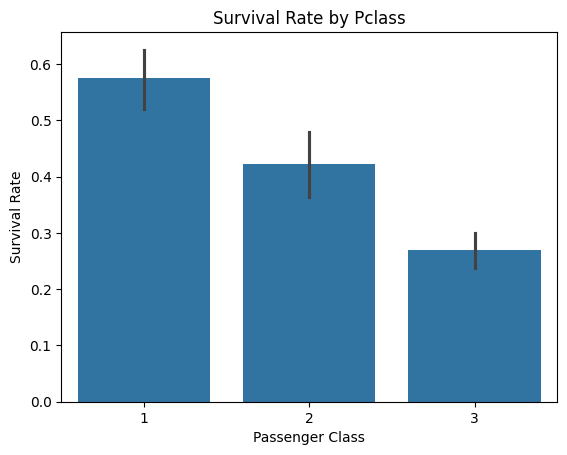

In [93]:
# 시각화
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 생존자 vs 비생존자 비율 원형 차트

- 이 코드는 생존했는지(Survived) 여부에 따라 인원수를 셉니다. (살아남은 사람 수, 살아남지 못한 사람 수)
- 그 인원수를 바탕으로 원형 차트를 그립니다.
- 차트에는 'Non-Survivors'(비생존자)와 'Survivors'(생존자)라고 표시되고, 각 그룹이 전체에서 몇 퍼센트를 차지하는지 숫자로도 보여줍니다.


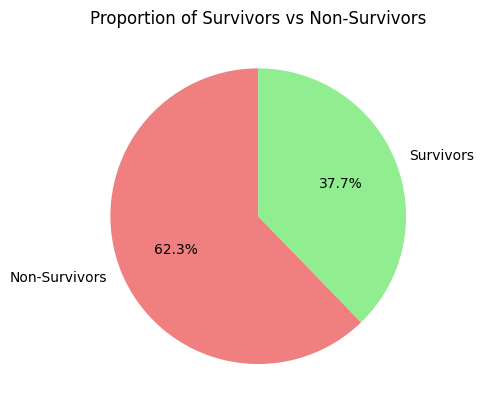

In [94]:
# 생존자 vs 비생존자 비율 원형 차트
survival_proportions = df['Survived'].value_counts()
plt.pie(survival_proportions, labels=['Non-Survivors', 'Survivors'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Proportion of Survivors vs Non-Survivors')
plt.show()

# 나이 분포 히스토그램

- 이 코드는 나이(Age) 정보를 가지고 히스토그램을 그립니다. (빠진 나이 정보는 제외합니다.)
- 히스토그램은 나이 구간별로 몇 명의 사람이 있는지 막대로 보여주는 그래프입니다.
- 막대 개수를 20개로 나누어 좀 더 자세히 볼 수 있습니다.
- 그래프를 보면 어떤 나이대의 사람들이 가장 많은지 알 수 있습니다.


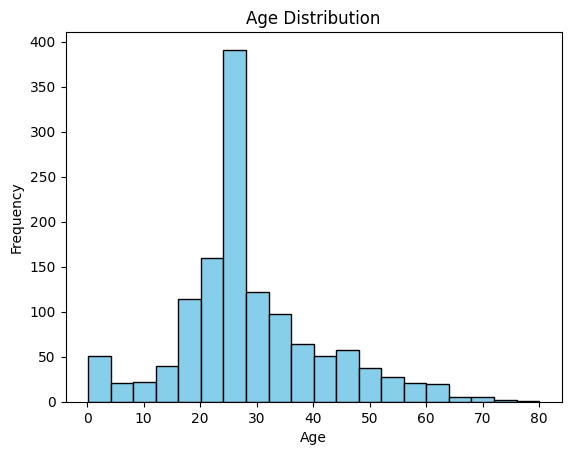

In [95]:
# 나이 분포 히스토그램
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 나이별 생존율

- 먼저 사람들의 나이를 0-10세, 10-20세 등 10살 단위로 그룹으로 나눕니다.
- 그리고 이 그룹 정보를 AgeGroup이라는 새 열에 저장합니다.
- 각 나이 그룹별로 총 몇 명이 있는지(count), 몇 명이 살았는지(sum), 그리고 평균적으로 얼마나 살았는지(mean)를 계산합니다.
- 평균 생존율에 100을 곱해서 생존율을 퍼센트(Survival Rate (%))로 만듭니다.
- 계산된 결과를 보기 좋게 표로 만들어서 보여줍니다.
- 표에는 각 나이 그룹의 총 인원, 생존자 수, 생존율이 포함됩니다."


In [96]:
# 나이를 10세 단위로 범주화
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                        labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
                        include_lowest=True)

# 나이 그룹별 생존율 계산
age_survival_rate = df.groupby('AgeGroup', observed=True)['Survived'].agg(['count', 'sum', 'mean'])
age_survival_rate['Survival Rate (%)'] = age_survival_rate['mean'] * 100
age_survival_rate = age_survival_rate[['count', 'sum', 'Survival Rate (%)']].round(2)
age_survival_rate.columns = ['Total Passengers', 'Survivors', 'Survival Rate (%)']

# 데이터프레임 표로 출력
print("\n전체 나이 그룹별 생존율:")
age_survival_rate


전체 나이 그룹별 생존율:


Total Passengers  Survivors  Survival Rate (%)
AgeGroup                                                
0-10                    86         48              55.81
10-20                  162         66              40.74
20-30                  624        206              33.01
30-40                  210         89              42.38
40-50                  132         48              36.36
50-60                   62         28              45.16
60-70                   27          7              25.93
70-80                    6          2              33.33

### 나이별 생존율 시각화


- 이 막대 그래프는 각 나이 그룹(AgeGroup)의 생존율(Survival Rate (%))을 보여줍니다.
- 나이 그룹 이름이 겹치지 않도록 글자를 45도 기울였습니다.
- 그래프를 보면 어떤 나이대의 생존율이 높았고 낮았는지 쉽게 비교할 수 있습니다.


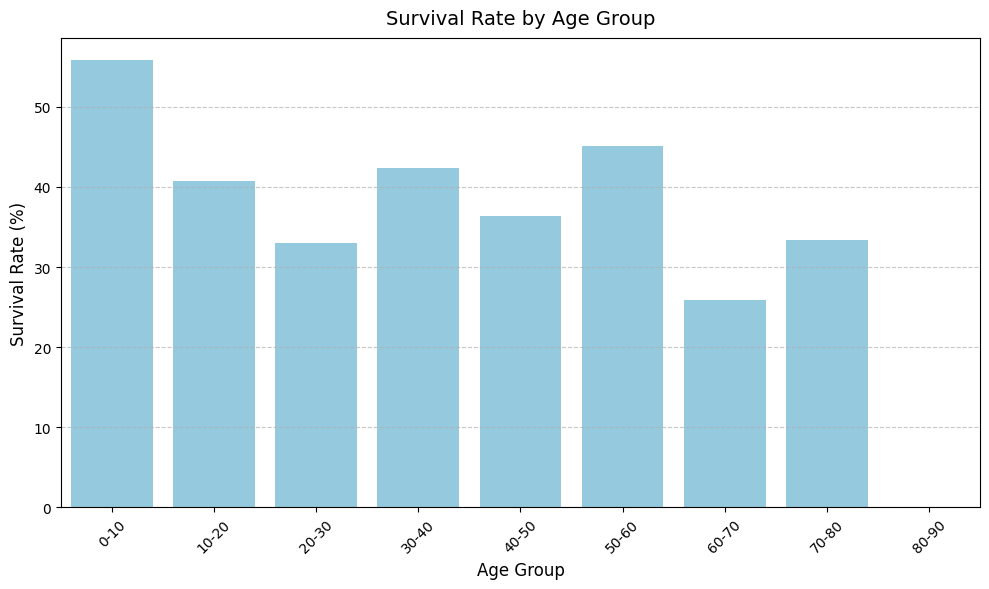

In [97]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate['Survival Rate (%)'], color='skyblue')
plt.title('Survival Rate by Age Group', fontsize=14, pad=10)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 성별별 생존율

- 이 코드는 성별(Sex)로 그룹을 나누고 각 그룹의 생존(Survived) 평균을 계산합니다.
- 계산된 평균에 100을 곱해서 퍼센트로 만듭니다.
- 그 결과를 출력하여 남성과 여성의 생존율을 숫자로 보여줍니다.

In [98]:
# 성별별 생존율 계산
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# 결과 출력
print("성별별 생존율 (%):")
survival_by_sex

성별별 생존율 (%):


Sex
female    82.618026
male      12.930012
Name: Survived, dtype: float64

### 성별별 생존율 시각화

- 'Female'(여성)과 'Male'(남성)을 막대로 표시하고, 각 성별의 생존율을 막대의 높이로 나타냅니다.
- 여성 막대는 빨간색 계열, 남성 막대는 파란색 계열로 색을 칠했습니다.
- 각 막대 위에 정확한 생존율 숫자를 퍼센트(%.2f%%)로 표시하여 더 쉽게 확인할 수 있도록 했습니다.
- Y축 범위는 0%부터 100%까지로 설정하여 생존율을 명확하게 보여줍니다.


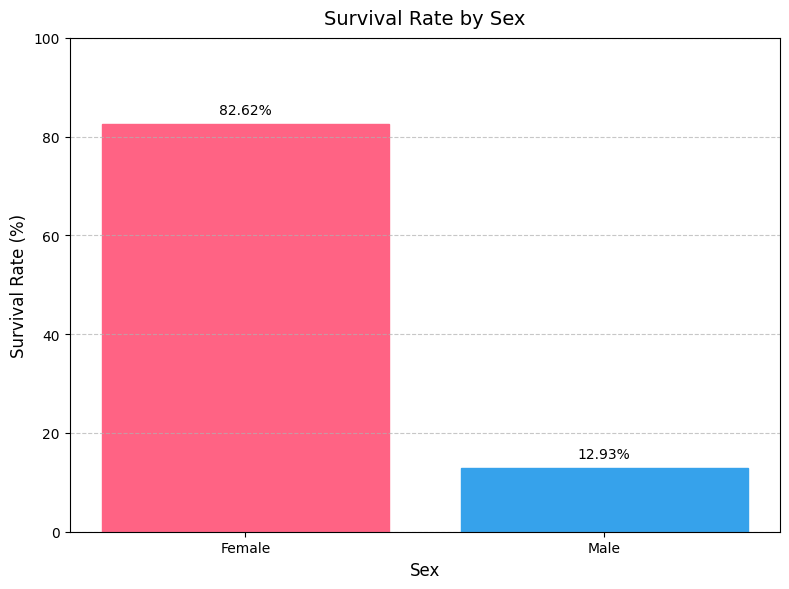

In [99]:
# 데이터 준비
labels = ['Female', 'Male']
survival_rates = [survival_by_sex['female'], survival_by_sex['male']]
colors = ['#FF6384', '#36A2EB']  # 여성: 핑크, 남성: 파랑

# 막대 차트 생성
plt.figure(figsize=(8, 6))  # 차트 크기 (너비 8인치, 높이 6인치)
plt.bar(labels, survival_rates, color=colors, edgecolor=colors, linewidth=1)

# 차트 설정
plt.title('Survival Rate by Sex', fontsize=14, pad=10)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Y축 범위 0~100%
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축 그리드 추가

# 값 레이블 추가 (각 막대 위에 생존율 표시)
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=10)

# 차트 표시
plt.tight_layout()
plt.show()

# 연령대와 성별에 따른 생존율

- 이 코드는 성별(Sex)과 나이 그룹(AgeGroup)으로 동시에 그룹을 나누고, 각 그룹의 생존 평균을 계산합니다.
- 계산된 평균 생존율을 퍼센트로 만듭니다.
- 결과를 표 형태로 만드는데, 표의 행(가로)은 나이 그룹(AgeGroup)으로, 열(세로)은 성별(Sex)로 구성하여 각 나이대별 남성과 여성의 생존율을 한눈에 볼 수 있게 합니다.


In [100]:
# 성별 및 연령대별 생존율 계산
sex_age_survival = df.groupby(['Sex', 'AgeGroup'], observed=True)['Survived'].mean().reset_index()
sex_age_survival['Survived'] *= 100

# 열과 행 지정
pivot_table = sex_age_survival.pivot_table(index='AgeGroup', columns='Sex', values='Survived', observed=True)

# 출력
print("연령대와 성별에 따른 생존율 (%):")
pivot_table

연령대와 성별에 따른 생존율 (%):


Sex           female       male
AgeGroup                       
0-10       70.731707  42.222222
10-20      82.352941  10.638298
20-30      81.862745   9.285714
30-40      88.000000  17.037037
40-50      78.260870  13.953488
50-60      96.000000  10.810811
60-70     100.000000   4.761905
70-80     100.000000  20.000000

## 연령대와 성별에 따른 생존율 시각화

- 이 막대 그래프는 각 나이 그룹(AgeGroup)별로 남성(Male)과 여성(Female)의 생존율을 따로따로 막대로 보여줍니다.
- 막대 위에 정확한 생존율 숫자를 퍼센트(%.1f%%)로 표시하여 더 자세히 알 수 있습니다.
- 그래프를 보면 특정 나이대에서 남성과 여성의 생존율 차이가 얼마나 큰지 등을 쉽게 비교할 수 있습니다.

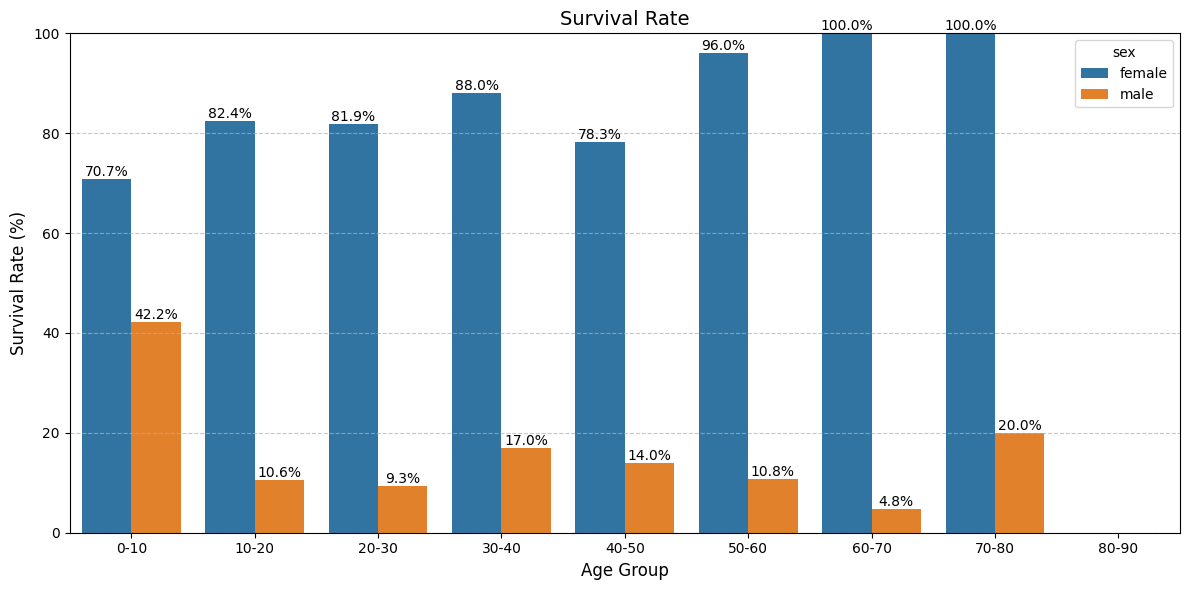

In [101]:
# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sex_age_survival, x='AgeGroup', y='Survived', hue='Sex')
plt.title('Survival Rate', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='sex', fontsize=10)
plt.tight_layout()

# 막대 그래프 위에 % 숫자 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

# 탑승한 항구별 인원


- 이 코드는 각 항구별로 탑승객 수를 세고, 그 결과를 '항구'와 '탑승 인원'이라는 열을 가진 데이터프레임으로 만들어서 보여줍니다.

In [102]:
# 항구별 인원수 데이터프레임 생성
embarked_counts_df = df["Embarked"].value_counts().reset_index()
embarked_counts_df.columns = ["항구", "탑승 인원"]

# 결과 출력
embarked_counts_df

항구  탑승 인원
0  S    916
1  C    270
2  Q    123

## 객실 등급에 따른 생존율 시각화




### 객실 등급에 따른 생존율 막대 그래프
- 이 그래프는 앞에서도 보았던 객실 등급별 생존율을 다시 한번 막대로 보여주는 것입니다. 객실 등급(1, 2, 3)별로 생존율 평균을 초록색 막대로 나타냅니다.

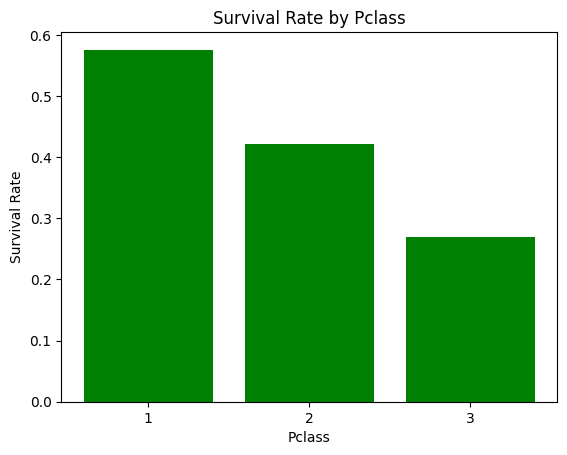

In [103]:
# 객실 등급에 따른 생존율 막대 그래프
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_by_pclass.index, survival_by_pclass.values, color='green')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks([1, 2, 3])  # 객실 등급 눈금 설정
plt.show()

###  객실 등급별 남녀 생존 숫자 그룹화된 막대 그래프

- 먼저 생존한 사람들(Survived == 1)만 따로 골라냅니다.
- 이 생존자들을 객실 등급(Pclass)과 성별(Sex)로 그룹화하여 각 그룹에 속한 사람 수를 셉니다.
- 이 숫자를 바탕으로 그룹화된 막대 그래프를 그립니다. 각 객실 등급 옆에 남성 생존자 수(파란색)와 여성 생존자 수(빨간색) 막대가 나란히 표시됩니다.
- 그래프를 통해 각 객실 등급에서 남성과 여성 중 누가 더 많이 살아남았는지 숫자로 비교할 수 있습니다.


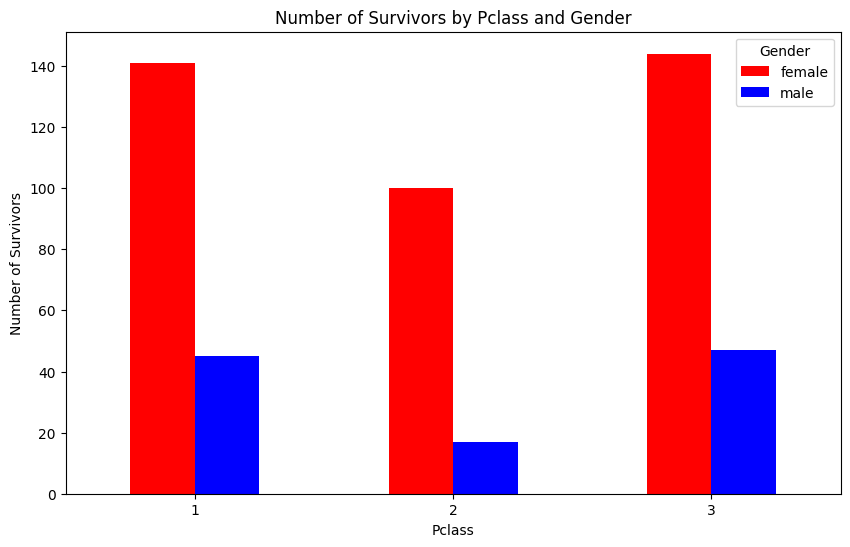

In [104]:
# 객실 등급별 남녀 생존 숫자 그룹화된 막대 그래프

# 생존자만 필터링
survived_df = df[df['Survived'] == 1]
# 객실 등급과 성별별로 생존자 수 집계
survival_by_pclass_gender = survived_df.groupby(['Pclass', 'Sex']).size().unstack()

# 그룹화된 막대 그래프 그리기
survival_by_pclass_gender.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Number of Survivors by Pclass and Gender')
plt.xlabel('Pclass')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)  # X축 레이블 회전 없음
plt.legend(title='Gender')
plt.show()

### 탑승한 항구별 인원 시각화

- 이 그래프는 각 항구(Embarked Port)에서 탑승한 사람 수(Passenger Count)를 막대의 높이로 보여줍니다.
- 각 항구를 다른 색깔(파랑, 초록, 주황)로 표시했습니다.
- 그래프를 보면 어느 항구에서 가장 많은 승객이 탑승했는지 쉽게 알 수 있습니다.

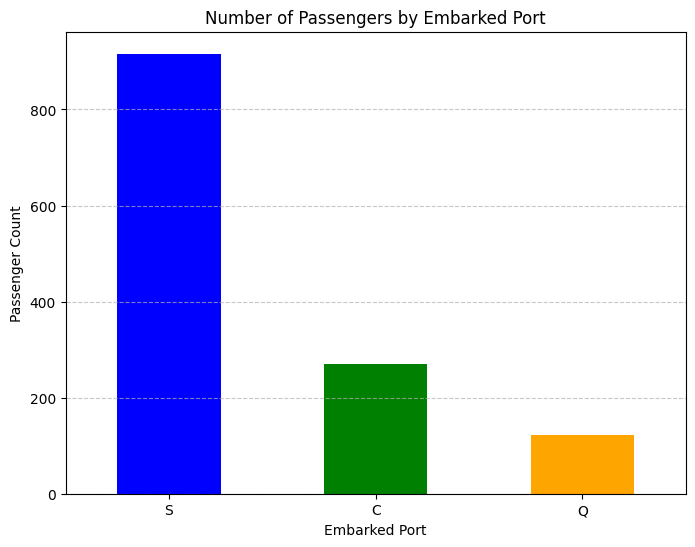

In [105]:
# 항구별 탑승 인원 계산
embarked_counts = df['Embarked'].value_counts()

# 시각화
plt.figure(figsize=(8,6))
embarked_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel("Embarked Port")
plt.ylabel("Passenger Count")
plt.title("Number of Passengers by Embarked Port")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

### 나이 vs 요금 산점도 (생존 여부로 색상 구분)

- 이 그래프는 가로축을 나이(Age), 세로축을 요금(Fare)으로 하는 점 그래프(산점도)입니다.
- 각 점은 한 명의 탑승객을 나타냅니다.
점의 색깔은 이 승객이 생존했는지(색깔 1) 아니면 사망했는지(색깔 0)를 나타냅니다.
- 색깔 옆에 생존 여부를 알 수 있는 막대(colorbar)도 함께 표시됩니다.
- 그래프를 보면 나이가 많거나 적은 사람, 요금을 비싸게 낸 사람, 싸게 낸 사람 중에 누가 더 많이 살았는지 대략적으로 파악할 수 있습니다."


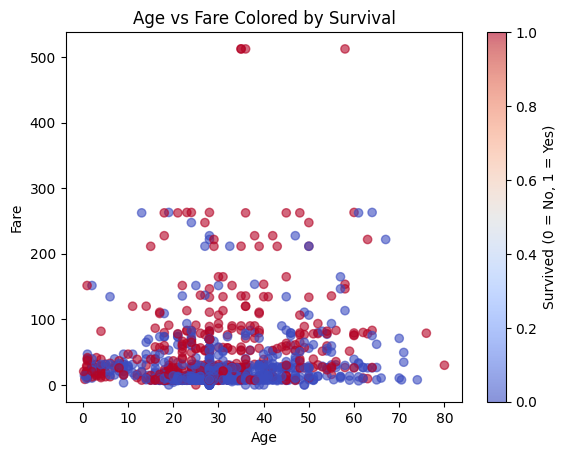

In [106]:
# 나이 vs 요금 산점도 (생존 여부로 색상 구분)
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.6)
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived (0 = No, 1 = Yes)')
plt.show()

# 자유 데이터

In [107]:
# 1. CSV 파일 불러오기
df1 = pd.read_csv("datajo/filtered_cardata_english.csv")
df1.sample(3)

월(Monthly)       시도명 시군구  승용_관용     승용_자가용   승용_영업용      승용_합계  승합_관용  \
179     22-Feb   Gangwon   계  1,881    625,002   11,771    638,654  1,568   
246     22-Jun  Gyeonggi   계  7,566  5,156,713   74,034  5,238,313  4,343   
714     24-Oct     Seoul   계  4,733  2,654,588  114,320  2,773,641  3,747   

      승합_자가용  승합_영업용  ...   화물_영업용    화물_합계 특수_관용  특수_자가용  특수_영업용   특수_합계  \
179   22,722   3,031  ...    8,863  162,136   194   2,306   1,836   4,336   
246  157,599  31,679  ...  126,258  838,168   610  14,144  11,872  26,626   
714   67,859  14,699  ...   59,836  306,353   417   5,941   5,207  11,565   

      총계_관용     총계_자가용   총계_영업용      총계_합계  
179   6,171    800,775   25,501    832,447  
246  18,142  6,034,743  243,843  6,296,728  
714  12,823  2,970,979  194,062  3,177,864  

[3 rows x 23 columns]

## 칼럼 확인

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  833 non-null    object
 1   시도명         833 non-null    object
 2   시군구         833 non-null    object
 3   승용_관용       833 non-null    object
 4   승용_자가용      833 non-null    object
 5   승용_영업용      833 non-null    object
 6   승용_합계       833 non-null    object
 7   승합_관용       833 non-null    object
 8   승합_자가용      833 non-null    object
 9   승합_영업용      833 non-null    object
 10  승합_합계       833 non-null    object
 11  화물_관용       833 non-null    object
 12  화물_자가용      833 non-null    object
 13  화물_영업용      833 non-null    object
 14  화물_합계       833 non-null    object
 15  특수_관용       833 non-null    int64 
 16  특수_자가용      833 non-null    object
 17  특수_영업용      833 non-null    object
 18  특수_합계       833 non-null    object
 19  총계_관용       833 non-null    object
 20  총계_자가용    

## 차량 수 비교

### 전체 비교

- 데이터 정리: 특정 열('총계_합계', '승용_합계', 등)에서 쉼표를 제거하고 누락된 값을 0으로 채운 다음, 해당 열의 데이터를 정수형으로 변환합니다.
- 월별 데이터 추출: 전체 데이터에서 2021년 4월 데이터와 2025년 4월 데이터를 각각 분리합니다.
- 요약 통계 계산: 각 차량 유형('승용', '승합', '화물', '특수')과 총계에 대해 2021년과 2025년의 총 대수, 증가량, 그리고 증가율(%)을 계산합니다.
- 결과 DataFrame 생성: 계산된 요약 통계를 포함하는 pandas DataFrame을 생성하고, 각 차량 유형을 행으로, 계산된 통계를 열로 표시합니다.
- 결과 출력: 생성된 요약 DataFrame을 화면에 출력합니다.

In [140]:
# 쉼표 제거 및 결측치 처리 후 정수형으로 변환
for col in ['총계_합계', '승용_합계', '승합_합계', '화물_합계', '특수_합계']:
    df1[col] = df1[col].replace(',', '', regex=True).fillna(0).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 각 항목별 합계 계산
summary_data = {}
for name, col in {
    '승용': '승용_합계',
    '승합': '승합_합계',
    '화물': '화물_합계',
    '특수': '특수_합계',
    '총계': '총계_합계',
}.items():
    val_2021 = df_2021[col].sum()
    val_2025 = df_2025[col].sum()
    increase = val_2025 - val_2021
    rate = round((increase / val_2021) * 100, 2)
    summary_data[name] = [val_2021, val_2025, increase, rate]

total_summary = pd.DataFrame.from_dict(
    summary_data,
    orient='index',
    columns=['2021', '2025', '증감량', '증가율(%)']
)

total_summary

2021      2025      증감량  증가율(%)
승용  20059455  21855843  1796388    8.96
승합    771015    653134  -117881  -15.29
화물   3621531   3703646    82115    2.27
특수    110206    144916    34710   31.50
총계  24562207  26357539  1795332    7.31

#### 전체 증가량 그래프

- 이 코드는 total_summary 데이터프레임에서 2021년과 2025년의 전체 차량 대수 데이터를 추출하고, 이를 사용하여 연도별 전체 차량 대수를 시각적으로 비교하는 막대 그래프를 그립니다. 그래프의 제목, 축 레이블, y축 포맷팅 등을 설정하여 정보를 명확하게 전달합니다.

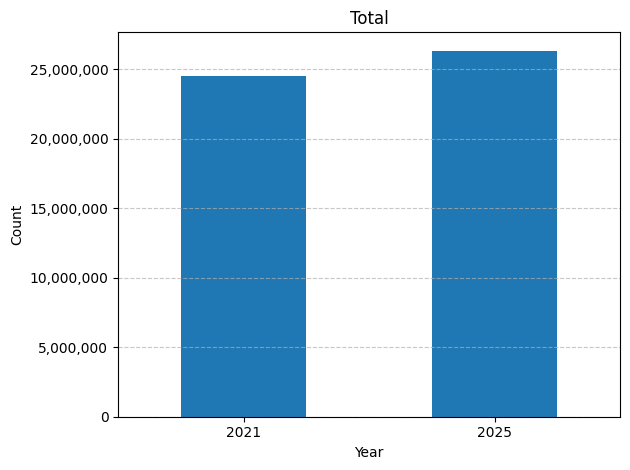

In [110]:
total_summary.loc[['총계'], ['2021', '2025']].T.plot(kind='bar', legend=False)
plt.title('Total')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

#### 전체 각 차종의 비율 그래프

- 이 코드는 차량 데이터에서 2021년과 2025년의 승용차, 승합차, 화물차, 특수차량 수를 비교하고 시각화합니다.

주요 내용은 다음과 같습니다.

- 데이터 준비: 특정 차량 종류와 연도('2021', '2025')의 데이터만 선택하여 새로운 데이터프레임 stacked_df를 만듭니다. 차량 종류의 이름을 영어로 변경하여 가독성을 높입니다.
- 스택형 막대 그래프 생성: stacked_df를 사용하여 스택형 막대 그래프를 그립니다. 각 막대는 연도를 나타내고, 막대 안의 쌓인 부분은 각 차량 종류의 대수를 나타냅니다. 제목, 축 레이블, y축 숫자 포맷 등이 설정됩니다.
- 백분율 레이블 추가: 각 막대 부분 위에 해당 차량 종류가 그 연도 전체 차량 대수에서 차지하는 백분율을 숫자로 표시합니다.
- 결과적으로 이 코드는 2021년과 2025년의 전체 차량 구성 및 각 차량 종류의 비율 변화를 스택형 막대 그래프와 백분율 숫자를 통해 한눈에 보여줍니다.

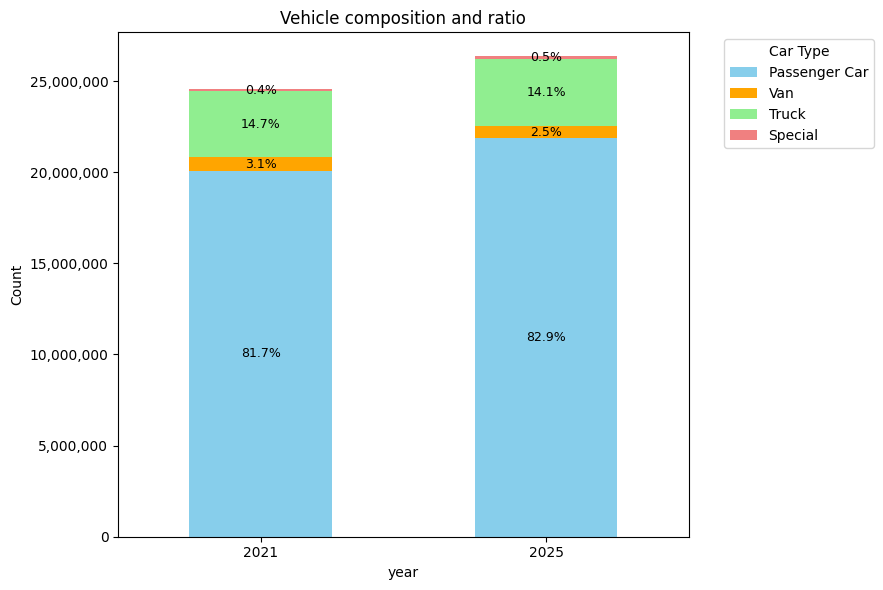

In [111]:
#차종만 추출
stacked_df = total_summary.loc[['승용', '승합', '화물', '특수'], ['2021', '2025']]
stacked_df.index = ['Passenger Car', 'Van', 'Truck', 'Special']

#스택형 막대그래프
ax = stacked_df.T.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 6),
    color=['skyblue', 'orange', 'lightgreen', 'lightcoral']
)

plt.title('Vehicle composition and ratio')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(title='Car Type', bbox_to_anchor=(1.05, 1), loc='upper left')

#퍼센트 라벨 추가

for idx, year in enumerate(['2021', '2025']):
    y_offset = 0
    total = total_summary.loc['총계', year]
    for vehicle in stacked_df.index:
        val = stacked_df.loc[vehicle, year]
        percent = val / total * 100
        if val > 0:
            ax.text(
                idx,
                y_offset + val / 2,
                f'{percent:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
        y_offset += val

plt.tight_layout()
plt.show()

#### 차종별 증감량

- 이 코드는 stacked_df 데이터프레임의 데이터를 사용하여 차량 종류별 차량 수 변화를 보여주는 막대 그래프를 생성하고 표시합니다.

주요 기능은 다음과 같습니다.

- 막대 그래프 생성: stacked_df 데이터를 기반으로 막대 그래프를 그립니다.
제목 및 축 레이블 설정: 그래프 제목과 x, y축의 레이블을 설정하여 그래프 내용을 명확히 합니다.
- x축 레이블 회전: x축의 차량 종류 레이블이 겹치지 않도록 45도 회전시킵니다.
가로 격자 추가: y축에 가로 점선 격자를 추가하여 값을 비교하기 쉽게 합니다.
- y축 숫자 포맷팅: y축의 큰 숫자에 천 단위 구분 기호를 추가하여 가독성을 높입니다.
레이아웃 조정: 그래프 요소가 겹치지 않도록 레이아웃을 자동으로 최적화합니다.
- 그래프 표시: 최종적으로 완성된 막대 그래프를 화면에 보여줍니다.

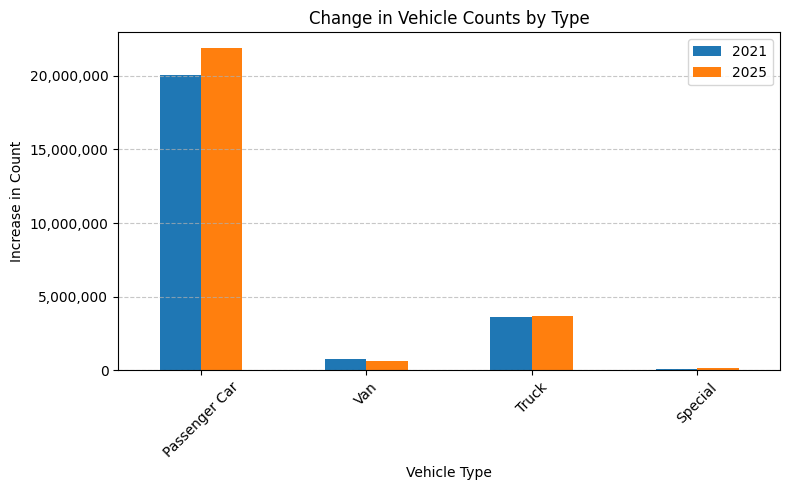

In [112]:
# 막대그래프 그리기
stacked_df.plot(kind='bar', figsize=(8,5))
plt.title('Change in Vehicle Counts by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Increase in Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 천 단위 콤마 표시
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

## 시도별 비교

### 시도별 차량 수

- 이 코드는 차량 데이터에서 2021년 4월과 2025년 4월의 시도별 총 차량 수를 비교하고 증가량을 계산합니다.

주요 과정:

- 데이터 정리: '총계_합계' 열의 쉼표를 제거하고 정수형으로 변환합니다.
- 데이터 필터링: 2021년 4월과 2025년 4월 데이터만 따로 추출합니다.
- 시도별 집계: 각 연도의 시도별 총 차량 수를 합계합니다.
-증가량 계산: 2025년 합계에서 2021년 합계를 빼서 시도별 증가량을 구합니다.
- 결과 정렬 및 출력: 증가량이 큰 순서대로 시도별 데이터를 정렬하여 표로 보여줍니다.
- 결과적으로 이 코드는 어느 시도에서 2021년 대비 2025년에 총 차량 수가 가장 많이 증가했는지를 파악하는 데 사용됩니다.

In [113]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_합계'] = df1['총계_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_합계'].sum(),
    '2025': df_2025.groupby('시도명')['총계_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
agg_data

시도명     2021     2025     증가량
8    Gyeonggi  6072288  6662107  589819
9   Gyeongnam  1805914  1991087  185173
13    Jeonnam  1129402  1290707  161305
0       Busan  1440236  1570642  130406
2    Chungnam  1159944  1279373  119429
11       Jeju   629896   711975   82079
1    Chungbuk   874972   951959   76987
10    Incheon  1674313  1750703   76390
7   Gyeongbuk  1487145  1556888   69743
5     Gangwon   814922   876354   61432
12    Jeonbuk   952899  1004595   51696
4     Daejeon   689873   739121   49248
3       Daegu  1219856  1259018   39162
6     Gwangju   694011   729267   35256
16      Ulsan   578699   608947   30248
14     Sejong   178762   203324   24562
15      Seoul  3159075  3171472   12397

#### 시도별 전체 비교 그래프

- 이 코드는 데이터프레임에서 시도별 2021년 4월과 2025년 4월의 총 차량 대수를 추출하고 이를 시각화하기 위해 데이터를 준비합니다.
- 데이터가 준비되면, 각 시도별로 두 연도의 차량 대수를 비교하는 그룹화된 막대 그래프를 생성합니다.

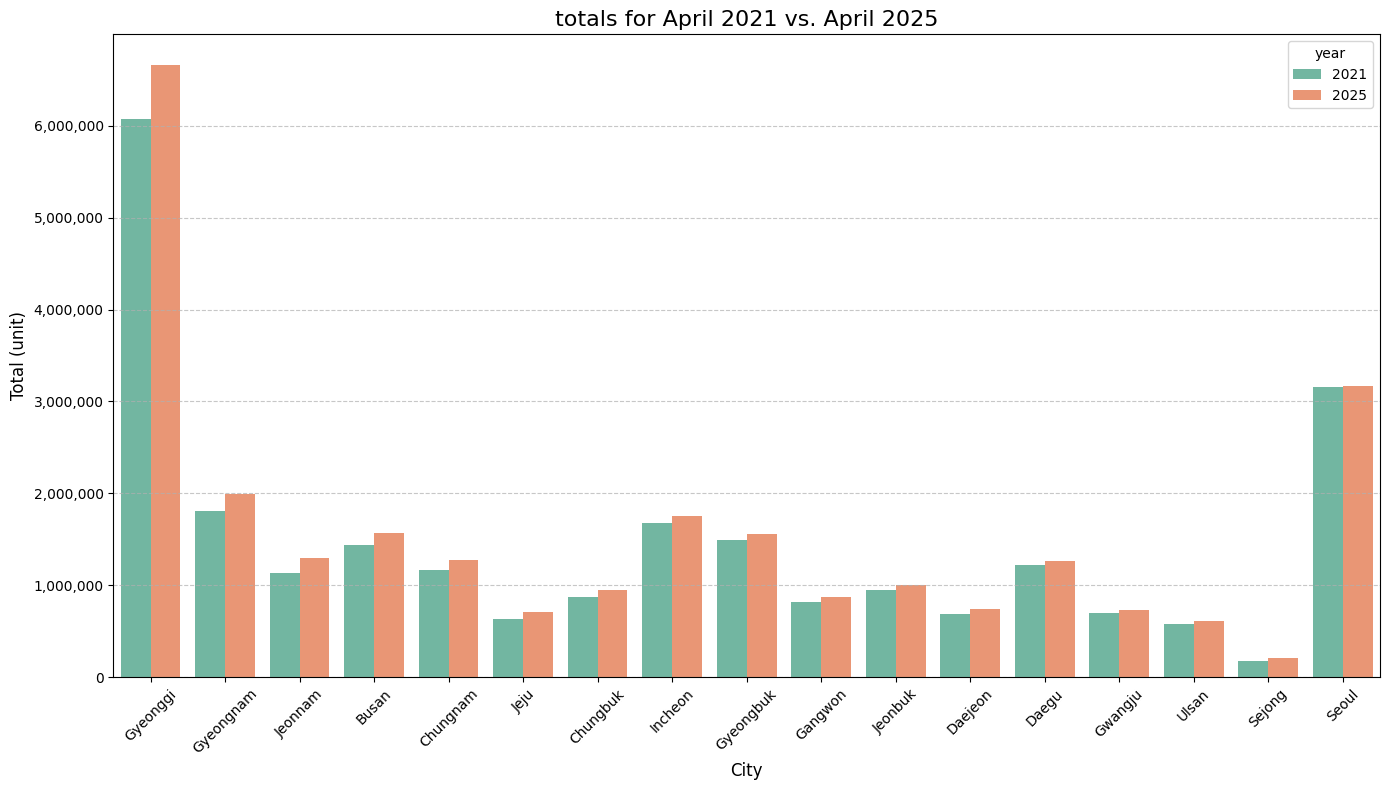

In [114]:
df_melted = agg_data.melt(id_vars='시도명', value_vars=['2021', '2025'],
                          var_name='year', value_name='총계_합계')

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='시도명', y='총계_합계', hue='year', palette='Set2')
plt.title('totals for April 2021 vs. April 2025', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total (unit)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

#### 시도별 증가량 그래프

- 이 파이썬 코드는 agg_data라는 데이터에서 지역별 총 차량 대수의 변화량('증가량')을 막대 그래프로 보여줍니다.

- 각 막대는 특정 '지역'을 나타냅니다.
- 막대의 높이는 2021년 4월부터 2025년 4월까지 해당 - 지역에서 차량 대수가 얼마나 늘었는지를 보여줍니다.
- 그래프 제목은 '지역별 총 차량 변화량'이고, x축은 '지역', - y축은 '차량 변화량 (대)'입니다.
- x축의 지역 이름이 겹치지 않도록 약간 기울여서 표시하고, - y축 값에는 천 단위 쉼표가 붙습니다.
- 결론적으로 이 그래프는 어느 지역에서 총 차량 대수가 가장 많이 증가했는지 시각적으로 쉽게 비교할 수 있게 해줍니다.

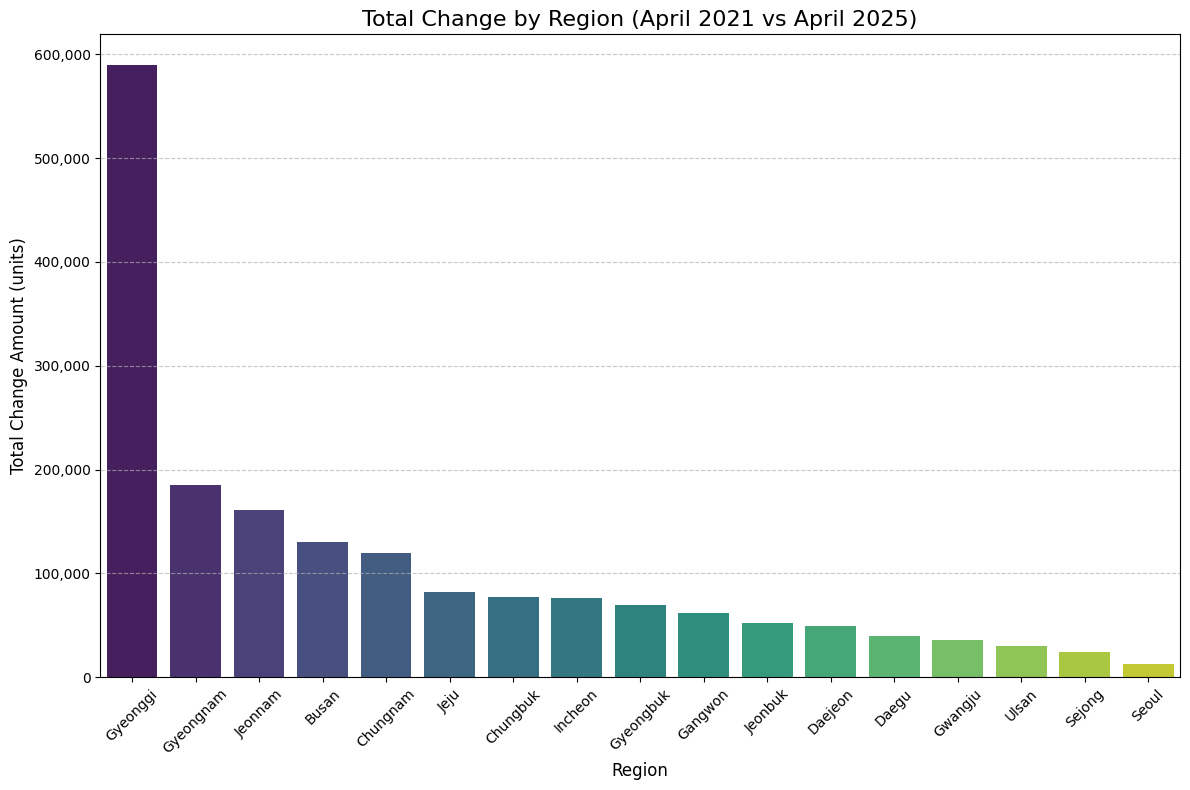

In [115]:
# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=agg_data['시도명'], y=agg_data['증가량'], hue=agg_data['시도명'],
            palette='viridis', legend=False)
plt.title('Total Change by Region (April 2021 vs April 2025)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Change Amount (units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

## 관용

### 승용_관용

- 이 코드는 '승용_관용' 열의 숫자에서 혹시 있을지 모르는 쉼표를 제거하고 숫자로 바꿉니다.
- 그리고 2021년 4월(21-Apr) 데이터와 2025년 4월(25-Apr) 데이터를 각각 분리합니다.
각 시/도별로 2021년 4월의 '승용_관용' 차량 대수와 2025년 4월의 '승용_관용' 차량 대수를 합계 냅니다.
- 그리고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량) 계산합니다.
- 이 '증가량'을 기준으로 가장 많이 늘어난 상위 10개 시/도를 순서대로 보여줍니다."


In [116]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_관용'] = df1['승용_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_관용 집계 및 증가량 계산
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_관용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_관용'].sum()
}).reset_index()
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 정렬 및 출력
agg_data = agg_data.sort_values('증가량', ascending=False)
print("\n승용_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)



승용_관용 증가량 데이터프레임 (상위 10개 지역):


시도명  2021  2025   증가량
8    Gyeonggi  7285  8329  1044
15      Seoul  4454  4804   350
0       Busan  1635  1922   287
13    Jeonnam  2145  2408   263
10    Incheon  1508  1765   257
9   Gyeongnam  2452  2683   231
5     Gangwon  1824  2052   228
12    Jeonbuk  1767  1990   223
2    Chungnam  1924  2119   195
7   Gyeongbuk  2575  2759   184

### 승합_관용

- 이 코드는 '승합_관용' 열의 숫자에서 혹시 있을지 모르는 쉼표를 제거하고 숫자로 바꿉니다.
- 그리고 2021년 4월(21-Apr) 데이터와 2025년 4월(25-Apr) 데이터를 각각 분리합니다.
각 시/도별로 2021년 4월의 '승합_관용' 차량 대수와 2025년 4월의 '승합_관용' 차량 대수를 합계 냅니다.
- 그리고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량) 계산합니다.
- 이 '증가량'을 기준으로 가장 많이 늘어난 상위 10개 시/도를 순서대로 보여줍니다."


In [117]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_관용'] = df1['승합_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_관용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_관용 증가량 데이터프레임 (상위 10개 지역):


시도명  2021  2025  증가량
3      Daegu   885  1023  138
10   Incheon  1056  1183  127
5    Gangwon  1578  1693  115
1   Chungbuk  1017  1129  112
13   Jeonnam  1583  1684  101
16     Ulsan   447   518   71
14    Sejong   183   249   66
12   Jeonbuk  1319  1383   64
2   Chungnam  1229  1293   64
0      Busan  1260  1281   21

### 화물_관용

- 이 코드는 '화물_관용' 열의 숫자에서 혹시 있을지 모르는 쉼표를 제거하고 숫자로 바꿉니다.
- 그리고 2021년 4월(21-Apr) 데이터와 2025년 4월(25-Apr) 데이터를 각각 분리합니다.
각 시/도별로 2021년 4월의 '화물_관용' 차량 대수와 2025년 4월의 '화물_관용' 차량 대수를 합계 냅니다.
- 그리고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량) 계산합니다.
- 이 '증가량'을 기준으로 가장 많이 늘어난 상위 10개 시/도를 순서대로 보여줍니다."


In [118]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_관용'] = df1['화물_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_관용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_관용 증가량 데이터프레임 (상위 10개 지역):


시도명  2021  2025  증가량
13    Jeonnam  2437  2754  317
4     Daejeon   637   909  272
5     Gangwon  2481  2725  244
12    Jeonbuk  2079  2319  240
8    Gyeonggi  5578  5783  205
9   Gyeongnam  2595  2775  180
2    Chungnam  2358  2500  142
6     Gwangju   707   840  133
7   Gyeongbuk  2944  3076  132
3       Daegu  1352  1463  111

### 특수_관용

- 이 코드는 '승용_관용' 열의 숫자에서 혹시 있을지 모르는 쉼표를 제거하고 숫자로 바꿉니다.
- 그리고 2021년 4월(21-Apr) 데이터와 2025년 4월(25-Apr) 데이터를 각각 분리합니다.
각 시/도별로 2021년 4월의 '특수_관용' 차량 대수와 2025년 4월의 '특수_관용' 차량 대수를 합계 냅니다.
- 그리고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량) 계산합니다.
- 이 '증가량'을 기준으로 가장 많이 늘어난 상위 10개 시/도를 순서대로 보여줍니다."


In [119]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_관용'] = df1['특수_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 특수_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_관용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_관용 증가량 데이터프레임 (상위 10개 지역):


시도명  2021  2025  증가량
7   Gyeongbuk   250   401  151
9   Gyeongnam   200   336  136
5     Gangwon   184   287  103
8    Gyeonggi   557   634   77
15      Seoul   368   431   63
13    Jeonnam   183   243   60
2    Chungnam   272   331   59
1    Chungbuk   119   168   49
12    Jeonbuk   164   210   46
3       Daegu   120   161   41

### 총계_관용

- 이 코드는 '총계_관용' 열의 숫자에서 혹시 있을지 모르는 쉼표를 제거하고 숫자로 바꿉니다.
- 그리고 2021년 4월(21-Apr) 데이터와 2025년 4월(25-Apr) 데이터를 각각 분리합니다.
각 시/도별로 2021년 4월의 '총계_관용' 차량 대수와 2025년 4월의 '총계_관용' 차량 대수를 합계 냅니다.
- 그리고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량) 계산합니다.
- 이 '증가량'을 기준으로 가장 많이 늘어난 상위 10개 시/도를 순서대로 보여줍니다."


In [120]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_관용'] = df1['총계_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_관용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_관용 증가량 데이터프레임 (상위 10개 지역):


시도명   2021   2025   증가량
8    Gyeonggi  17631  18964  1333
13    Jeonnam   6348   7089   741
5     Gangwon   6067   6757   690
12    Jeonbuk   5329   5902   573
9   Gyeongnam   7147   7694   547
2    Chungnam   5783   6243   460
10    Incheon   4001   4454   453
7   Gyeongbuk   7540   7993   453
3       Daegu   3325   3757   432
15      Seoul  12421  12850   429

## 자가용

### 승용_자가용

- 이 코드는 '승용_자가용' 열의 데이터를 정리하고
2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '승용_자가용' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '승용_자가용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [121]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_자가용'] = df1['승용_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계 및 증가량 계산
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_자가용'].sum()
}).reset_index()
agg_data['증가량'] = agg_data['2025'] - agg_data['2021'] # 주의: 승합_자가용 부분에서 증가량 계산 방향이 반대였음

# 증가량 기준 정렬 및 출력
agg_data = agg_data.sort_values('증가량', ascending=False)
print("\n승용_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_자가용 증가량 데이터프레임 (상위 10개 지역):


시도명     2021     2025     증가량
8    Gyeonggi  4954640  5514345  559705
10    Incheon  1130334  1277524  147190
9   Gyeongnam  1366044  1509708  143664
2    Chungnam   873756   982867  109111
0       Busan  1112514  1192674   80160
13    Jeonnam   696185   770408   74223
1    Chungbuk   665802   736345   70543
7   Gyeongbuk  1094239  1163933   69694
15      Seoul  2589024  2657685   68661
5     Gangwon   609435   667347   57912

### 승합_자가용

- 이 코드는 '승합_자가용' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '승합_자가용' 차량 대수의 합계를 구하고 2021년 대수에서 2025년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '승합_자가용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [122]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_자가용'] = df1['승합_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_자가용'] = df1['승합_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_자가용 증가량 데이터프레임 (상위 10개 지역):


시도명    2021    2025    증가량
8    Gyeonggi  165249  134415  30834
15      Seoul   85183   65451  19732
9   Gyeongnam   43445   36133   7312
10    Incheon   36147   29031   7116
0       Busan   33924   27191   6733
7   Gyeongbuk   40524   34857   5667
2    Chungnam   34266   29301   4965
3       Daegu   25238   20973   4265
5     Gangwon   23580   19329   4251
12    Jeonbuk   26736   22553   4183

### 화물_자가용

- 이 코드는 '화물_자가용' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '화물_자가용' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '화물_자가용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [123]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_자가용'] = df1['화물_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_자가용 증가량 데이터프레임 (상위 10개 지역):


시도명    2021    2025    증가량
8    Gyeonggi  691654  712132  20478
2    Chungnam  203837  214495  10658
13    Jeonnam  223519  233983  10464
11       Jeju   76994   85854   8860
1    Chungbuk  142521  148124   5603
12    Jeonbuk  170026  175280   5254
5     Gangwon  148792  153286   4494
9   Gyeongnam  264642  268806   4164
7   Gyeongbuk  293268  296052   2784
10    Incheon  160921  163235   2314

### 특수_자가용

- 이 코드는 '특수_자가용' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '특수_자가용' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '측수_자가용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [124]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_자가용'] = df1['특수_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_자가용 증가량 데이터프레임 (상위 10개 지역):


시도명   2021   2025   증가량
8    Gyeonggi  10730  18876  8146
15      Seoul   3842   6081  2239
7   Gyeongbuk   3195   5257  2062
2    Chungnam   2494   4531  2037
9   Gyeongnam   3255   5287  2032
10    Incheon   2394   4222  1828
1    Chungbuk   1931   3601  1670
5     Gangwon   1891   3329  1438
13    Jeonnam   2726   4149  1423
3       Daegu   1639   3007  1368

### 총계_자가용

- 이 코드는 '총계_자가용' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '총계_자가용' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '총계_자가용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [125]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_자가용'] = df1['총계_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_자가용'] = df1['총계_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_자가용 증가량 데이터프레임 (상위 10개 지역):


시도명     2021     2025     증가량
8    Gyeonggi  5822273  6379768  557495
10    Incheon  1329796  1474012  144216
9   Gyeongnam  1677386  1819934  142548
2    Chungnam  1114353  1231194  116841
13    Jeonnam   951943  1034026   82083
1    Chungbuk   834536   908820   74284
7   Gyeongbuk  1431226  1500099   68873
0       Busan  1299528  1368169   68641
5     Gangwon   783698   843291   59593
12    Jeonbuk   908715   963221   54506

## 영업용

### 승용_영업용

- 이 코드는 '승용_영업용' 열의 데이터를 정리하고
2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '승용_영업용' 차량 대수의 합계를 구하고
2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '승용_영업용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [126]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_영업용'] = df1['승용_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_영업용 증가량 데이터프레임 (상위 10개 지역):


시도명    2021    2025    증가량
13    Jeonnam  138190  215594  77404
0       Busan   87229  145875  58646
9   Gyeongnam   83346  122983  39637
11       Jeju  231037  270364  39327
4     Daejeon   14147   33079  18932
8    Gyeonggi   70246   80613  10367
3       Daegu   25795   31252   5457
14     Sejong     654    1210    556
1    Chungbuk   15356   15653    297
5     Gangwon   11695   11976    281

### 승합_영업용

- 이 코드는 '승합_영업용' 열의 데이터를 정리하고
2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '승합_영업용' 차량 대수의 합계를 구하고
2021년 대수에서 2025년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '승합_영업용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.


In [127]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_영업용'] = df1['승합_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_영업용'] = df1['승합_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_영업용 증가량 데이터프레임 (상위 10개 지역):


시도명   2021   2025   증가량
10    Incheon  10601   7378  3223
15      Seoul  15230  14562   668
11       Jeju   6960   6341   619
9   Gyeongnam   7369   6995   374
12    Jeonbuk   4118   3894   224
7   Gyeongbuk   5345   5185   160
2    Chungnam   5347   5199   148
5     Gangwon   3105   2976   129
6     Gwangju   2364   2282    82
13    Jeonnam   7682   7615    67

### 화물_영업용


- 이 코드는 '화물_영업용' 열의 데이터를 정리하고
2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '화물_영업용' 차량 대수의 합계를 구하고
2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '화물_영업용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [128]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_영업용'] = df1['화물_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_영업용'] = df1['화물_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_영업용 증가량 데이터프레임 (상위 10개 지역):


시도명    2021    2025    증가량
8    Gyeonggi  118673  138021  19348
10    Incheon   31769   35552   3783
9   Gyeongnam   25146   27735   2589
0       Busan   33906   36254   2348
2    Chungnam   18037   19888   1851
1    Chungbuk   14535   16278   1743
3       Daegu   19309   20756   1447
15      Seoul   58164   59389   1225
6     Gwangju   13546   14733   1187
12    Jeonbuk   15412   16561   1149

### 특수_영업용


- 이 코드는 '특수_영업용' 열의 데이터를 정리하고
2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '특수_영업용' 차량 대수의 합계를 구하고
2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '특수_영업용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [129]:

# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_영업용'] = df1['특수_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 특수_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_영업용 증가량 데이터프레임 (상위 10개 지역):


시도명   2021   2025  증가량
8    Gyeonggi  11433  12395  962
12    Jeonbuk   2246   2586  340
7   Gyeongbuk   5093   5416  323
2    Chungnam   3018   3304  286
13    Jeonnam   4926   5202  276
9   Gyeongnam   5520   5746  226
5     Gangwon   1763   1980  217
1    Chungbuk   2777   2939  162
15      Seoul   4990   5146  156
6     Gwangju   1829   1960  131

### 총계_영업용


- 이 코드는 '총계_영업용' 열의 데이터를 정리하고
2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '총계_영업용' 차량 대수의 합계를 구하고
2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '총계_영업용' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [130]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_영업용'] = df1['총계_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_영업용 증가량 데이터프레임 (상위 10개 지역):


시도명    2021    2025    증가량
13    Jeonnam  171111  249592  78481
0       Busan  136081  197503  61422
9   Gyeongnam  121381  163459  42078
11       Jeju  242325  281792  39467
8    Gyeonggi  232384  263375  30991
4     Daejeon   29616   49560  19944
3       Daegu   51159   58150   6991
1    Chungbuk   36401   38681   2280
2    Chungnam   39808   41936   2128
5     Gangwon   25157   26306   1149

## 합계

### 승용_합계

- 이 코드는 '승용_합계' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '승용_합계' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '승용_합계' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [131]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_합계'] = df1['승용_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_합계'].sum(),
    '2025': df_2025.groupby('시도명')['승용_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_합계 증가량 데이터프레임 (상위 10개 지역):


시도명     2021     2025     증가량
8    Gyeonggi  5032171  5603287  571116
9   Gyeongnam  1451842  1635374  183532
13    Jeonnam   836520   988410  151890
0       Busan  1201378  1340471  139093
2    Chungnam   889086   998531  109445
10    Incheon  1424641  1503198   78557
11       Jeju   528220   602038   73818
1    Chungbuk   682503   753496   70993
7   Gyeongbuk  1110473  1179904   69431
5     Gangwon   622954   681375   58421

### 승합_합계


- 이 코드는 '승합_합계' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '승합_합계' 차량 대수의 합계를 구하고 2021년 대수에서 2025년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '승합_합계' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [132]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_합계'] = df1['승합_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_합계'].sum(),
    '2025': df_2025.groupby('시도명')['승합_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_합계 증가량 데이터프레임 (상위 10개 지역):


시도명    2021    2025    증가량
8    Gyeonggi  201492  170979  30513
15      Seoul  104101   83714  20387
10    Incheon   47804   37592  10212
9   Gyeongnam   52714   45028   7686
0       Busan   41207   34797   6410
7   Gyeongbuk   47640   41799   5841
2    Chungnam   40842   35793   5049
12    Jeonbuk   32173   27830   4343
5     Gangwon   28263   23998   4265
3       Daegu   30069   25900   4169

### 화물_합계


- 이 코드는 '화물_합계' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '화물_합계' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '화물_합계' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [133]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_합계'] = df1['화물_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_합계'].sum(),
    '2025': df_2025.groupby('시도명')['화물_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_합계 증가량 데이터프레임 (상위 10개 지역):


시도명    2021    2025    증가량
8    Gyeonggi  815905  855936  40031
2    Chungnam  224232  236883  12651
13    Jeonnam  246269  257918  11649
11       Jeju   81715   91268   9553
1    Chungbuk  158610  166065   7455
9   Gyeongnam  292383  299316   6933
12    Jeonbuk  187517  194160   6643
10    Incheon  194011  200147   6136
5     Gangwon  159867  165385   5518
7   Gyeongbuk  320494  324111   3617

### 특수_합계


- 이 코드는 '특수_합계' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '특수_합계' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '특수_합계' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [134]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_합계'] = df1['특수_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 특수_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_합계'].sum(),
    '2025': df_2025.groupby('시도명')['특수_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_합계 증가량 데이터프레임 (상위 10개 지역):


시도명   2021   2025   증가량
8    Gyeonggi  22720  31905  9185
7   Gyeongbuk   8538  11074  2536
15      Seoul   9200  11658  2458
9   Gyeongnam   8975  11369  2394
2    Chungnam   5784   8166  2382
10    Incheon   7857   9766  1909
1    Chungbuk   4827   6708  1881
13    Jeonnam   7835   9594  1759
5     Gangwon   3838   5596  1758
12    Jeonbuk   4417   6128  1711

### 총계_합계


- 이 코드는 '총계_합계' 열의 데이터를 정리하고 2021년 4월과 2025년 4월 데이터를 분리합니다.
- 각 시/도별 '총계_합계' 차량 대수의 합계를 구하고 2025년 대수에서 2021년 대수를 빼서 얼마나 늘었는지(증가량)를 계산합니다.
- 그 결과, '총계_합계' 차량이 가장 많이 늘어난 상위 10개 시/도를 보여줍니다.

In [135]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_합계'] = df1['총계_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_합계'].sum(),
    '2025': df_2025.groupby('시도명')['총계_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_합계 증가량 데이터프레임 (상위 10개 지역):


시도명     2021     2025     증가량
8    Gyeonggi  6072288  6662107  589819
9   Gyeongnam  1805914  1991087  185173
13    Jeonnam  1129402  1290707  161305
0       Busan  1440236  1570642  130406
2    Chungnam  1159944  1279373  119429
11       Jeju   629896   711975   82079
1    Chungbuk   874972   951959   76987
10    Incheon  1674313  1750703   76390
7   Gyeongbuk  1487145  1556888   69743
5     Gangwon   814922   876354   61432

# 감사합니다